# Madrigal Example
An example of reading in ISR data from Madgrigal and making some basic plots.

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

## Read in Data 
This block of code reads in the Madrigal hdf5 file and prunes data to desired antenna, pulse mode and altitude window. 

In [13]:
filename = 'mlh181109g.001.hdf5'# Name of file
imode = 'LP'
m_num = 115 # Mode number 115 is long pulse 97 is alternating code.
a_lim = [150,750] # Altitude window in km
kinst = 32# Zenith antenna is 32 MISA is 31
# Parameter to plot
i_param = 'ne' # Parameter name can be NE, TE, TI or V0
i_lim = [1e10, 5e11] # 
i_str = '$N_e$ in m$^{-3}$'
# Read in using Pandas
d_f = pd.read_hdf(filename,'Data/Table Layout')
# Add datetime to data frame.
d_f['utc_time'] = pd.to_datetime(d_f['ut1_unix'], unit='s')
# Pruning mode, instrument(antenna at Millstone) and altitude.
d_f = d_f[d_f['mdtyp']==m_num]
d_f = d_f[d_f['kinst']==kinst]
alt_window = np.logical_and(d_f['gdalt']>=a_lim[0],  d_f['gdalt']<a_lim[1])
d_f = d_f[alt_window]
# Pivot for plotting 
ddata = d_f.pivot(index='gdalt', columns='utc_time', values=i_param)

## Plotting
This portion plots out the desired data in a range time intensity figure. This plot shows how the parameter changes as a function of time and altitude(or range). 

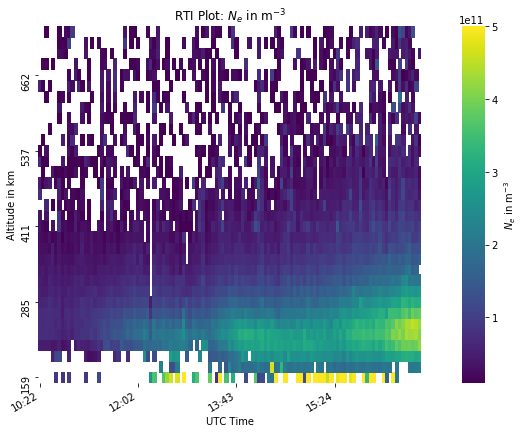

In [23]:
grid_kws = {"width_ratios": (.85, .05), "hspace":0.45, 'top':0.95}
f_data, axmat = plt.subplots(1, 2, figsize=(8, 6), gridspec_kw=grid_kws)

curax = axmat[0]
cbar_ax = axmat[1]

ax1 = sns.heatmap(data=ddata, vmin=i_lim[0], vmax=i_lim[1], cmap='viridis',
                  xticklabels=30, yticklabels=7, ax=curax, cbar_ax=cbar_ax, )
# curax.set_ylim(r_lim[0],r_lim[1])
ax1.invert_yaxis()
#curax.set_ylim(r_lim[0],r_lim[1])
ax1.set_xticklabels(ddata.columns[::30].strftime('%H:%M'))
ax1.set_yticklabels(ddata.index.values[::7].astype(int))
ax1.set_xlabel('UTC Time')
ax1.set_ylabel('Altitude in km')

for label in ax1.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
cbar_ax.set_ylabel(i_str)
#ax1.yaxis.set_major_formatter(majorFormatter)
t1 = curax.set_title('RTI Plot: {0}'.format(i_str))